# Stock Modigliani Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'AMD' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def modigliani_ratio(stocks_returns, market_returns, rf):
    days = 252
    volatility = stocks_returns.std() * np.sqrt(days) 
    sharpe_ratio = (stocks_returns.mean() - rf) / volatility 
    benchmark_volatility = market_returns.std() * np.sqrt(days)
    m2_ratio = (sharpe_ratio * benchmark_volatility) + rf
    return m2_ratio

In [7]:
modigliani_ratio(stocks_returns, market_returns, rf)

Date
2019-01-03    0.001821
2019-01-04    0.001708
2019-01-07    0.001651
2019-01-08    0.001651
2019-01-09    0.001651
2019-01-10    0.001708
2019-01-11    0.001764
2019-01-14    0.001595
2019-01-15    0.001764
2019-01-16    0.001708
2019-01-17    0.001764
2019-01-18    0.001651
2019-01-22    0.001708
2019-01-23    0.001651
2019-01-24    0.001820
2019-01-25    0.001595
2019-01-28    0.001708
2019-01-29    0.001651
2019-01-30    0.001764
2019-01-31    0.001651
2019-02-01    0.001702
2019-02-04    0.001708
2019-02-05    0.001651
2019-02-06    0.001764
2019-02-07    0.001651
2019-02-08    0.001764
2019-02-11    0.001595
2019-02-12    0.001764
2019-02-13    0.001651
2019-02-14    0.001764
                ...   
2020-05-19    0.001651
2020-05-20    0.001651
2020-05-21    0.001708
2020-05-22    0.001595
2020-05-26    0.001708
2020-05-27    0.001595
2020-05-28    0.001651
2020-05-29    0.001651
2020-06-01    0.001708
2020-06-02    0.001651
2020-06-03    0.001651
2020-06-04    0.001651
2020-0

In [8]:
m2 = modigliani_ratio(stocks_returns, market_returns, rf)

Text(0, 0.5, 'Modigliani Ratio')

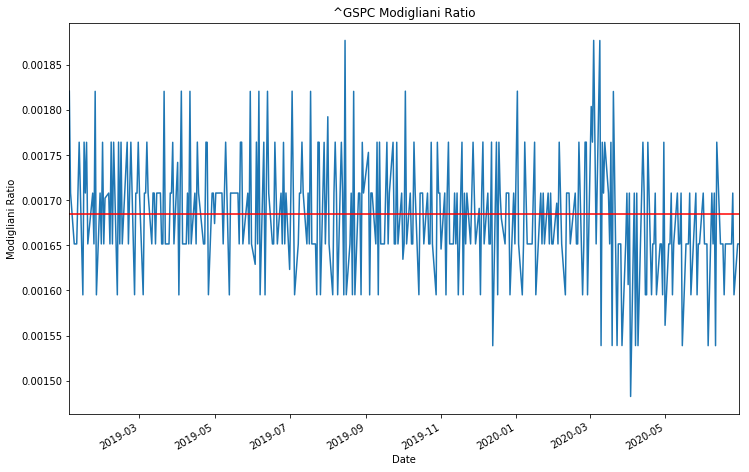

In [9]:
m2.plot(figsize=(12,8), title = symbol1 + ' Modigliani Ratio')
plt.axhline(y=m2.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Modigliani Ratio')